## FRP2_HVAC
In this notebook we will forecast half-hour energy use.

#### Loading  Data:####

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
import os
import glob
import warnings
warnings.filterwarnings("ignore")

Here,We concatenate the csv files containing the data into one csv file titled 'combined_csv'

In [13]:
path = r'C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,dtype={'Unnamed: 1=':np.float64})
    df1 = df.iloc[:,0:2]
    print(filename,df.shape)
    li.append(df1)

frame = pd.concat(li, axis=0, ignore_index=False)
#frame.to_csv( "combined_csv.csv", index=False )

C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-a.csv (78424, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-b.csv (40327, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-c.csv (70307, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-d.csv (16099, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-e.csv (35431, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-f.csv (42836, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Data\Small and medium commercial buildings\FRP2_HVAC_30s-g.csv (45505, 78)
C:\Users\21699\Desktop\myapp\ml_research\Anomaly_Detection\Dat

#### Data understanding:

In [14]:
frame.head()

,TOA5,Unnamed: 1
0,TIMESTAMP,W_BldgTot
1,TS,W
2,NaN,Smp
3,3/4/2016 17:28,9279.285
4,3/4/2016 17:28,9210.037


Here we delete the unecessary rows

In [15]:

frame=frame.drop(frame.index[0])

In [16]:
frame=frame.drop(frame.index[0])

In [17]:
frame=frame.drop(frame.index[0])

Change names of columns to have sense

In [18]:
frame=frame.rename(columns={"TOA5": "Date", "Unnamed: 1": "Energy"})

In [19]:
frame.head()

,Date,Energy
3,3/4/2016 17:28,9279.285
4,3/4/2016 17:28,9210.037
5,3/4/2016 17:29,9002.292
6,3/4/2016 17:29,8933.044
7,3/4/2016 17:30,8933.044


In [25]:
frame['Energy']=pd.to_numeric(frame['Energy'])

In [26]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806045 entries, 3 to 175063
Data columns (total 2 columns):
Date      806045 non-null object
Energy    806045 non-null float64
dtypes: float64(1), object(1)
memory usage: 18.4+ MB


#### Data Vizualisation:

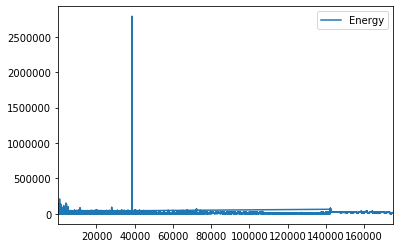

In [28]:
frame.plot()


Take a look in the boxplot to have more idea about the distribuation of the data.

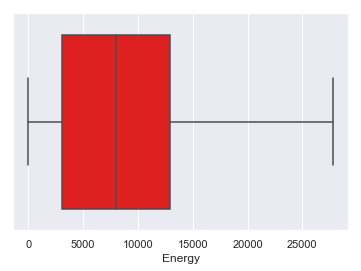

In [562]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.boxplot(df1['Energy'],showfliers=False,orient='h',notch=False,color='red')

#### Data preprocessing:

Delete the duplicate rows that have the same datetime

In [559]:
df = pd.read_csv('combined.csv',dtype={'Energy':np.float64})
df.drop_duplicates(subset='Date', keep='first', inplace=True)
df1=df.reset_index()
del df1['index']
df1.head()


,Date,Energy
0,3/4/2016 17:28,9279.285
1,3/4/2016 17:29,9002.292
2,3/4/2016 17:30,8933.044
3,3/4/2016 17:31,8863.795
4,3/4/2016 17:32,8863.795


Change the index values of column Date to datetime type

In [560]:
df1['Date'] = pd.to_datetime(df1['Date'],errors='coerce')
print (df1['Date'].dtypes)
df1=df1.set_index('Date')
df1.head()

datetime64[ns]


,Energy
Date,
2016-03-04 17:28:00,9279.285
2016-03-04 17:29:00,9002.292
2016-03-04 17:30:00,8933.044
2016-03-04 17:31:00,8863.795
2016-03-04 17:32:00,8863.795


Check for gaps 

In [451]:
list_datetime=[index for index in df1.index ]

In [250]:
from datetime import datetime
def check_gap(tol):
 d=[] 
 l={}
 cmpt=0
 for i in range (len(list_datetime)-1):
  s1=list_datetime[i].strftime("%Y-%m-%d %H:%M:%S")
  s2=list_datetime[i+1].strftime("%Y-%m-%d %H:%M:%S")
  FMT= '%Y-%m-%d %H:%M:%S'
  tdelta=datetime.strptime(s2,FMT)-datetime.strptime(s1,FMT)
  if(tdelta.seconds>tol):
        d.append(i)
        d.append(i+1)
        l['Gap '+str(cmpt)]='The Gap period:'+str(tdelta.seconds)+' sec => Start at '+s1+'|'+'End at '+s2+''
        cmpt=cmpt+1
 print('We have '+str(cmpt)+' Gaps!')
 print(l) 
 print(d)
check_gap(3600)

We have 4 Gaps!
{'Gap 0': 'The Gap period:60150 sec => Start at 2016-05-18 12:33:30|End at 2016-05-23 05:16:00', 'Gap 1': 'The Gap period:17820 sec => Start at 2016-06-27 08:51:30|End at 2016-06-28 13:48:30', 'Gap 2': 'The Gap period:34560 sec => Start at 2016-10-06 00:09:00|End at 2016-10-06 09:45:00', 'Gap 3': 'The Gap period:21540 sec => Start at 2016-11-02 19:25:00|End at 2016-11-03 01:24:00'}
[176079, 176080, 277275, 277276, 488661, 488662, 528119, 528120]


split data to avoid gaps

In [452]:
df11=df1.loc[0:176079]
df12=df1.loc[176080:277275]
df13=df1.loc[277276:488661]
df14=df1.loc[488662:528119]
df15=df1.loc[528120:]


Make the Date column as index in each Dataframe

In [453]:
df11= df11.set_index('Date')
df12=df12.set_index('Date')
df13=df13.set_index('Date')
df14=df14.set_index('Date')
df15=df15.set_index('Date')

Resample the data with 30 minutes frequency

In [550]:
df11r = df11.resample("30T",base=28).ffill()
df12r = df12.resample("30T",base=16).ffill()
df13r = df13.resample("30T",base=18).bfill()
df14r = df14.resample("30T",base=15).ffill()
df15r = df15.resample("30T",base=24).ffill()



Plot the resampling data:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B9E51BBA8>],
      dtype=object)

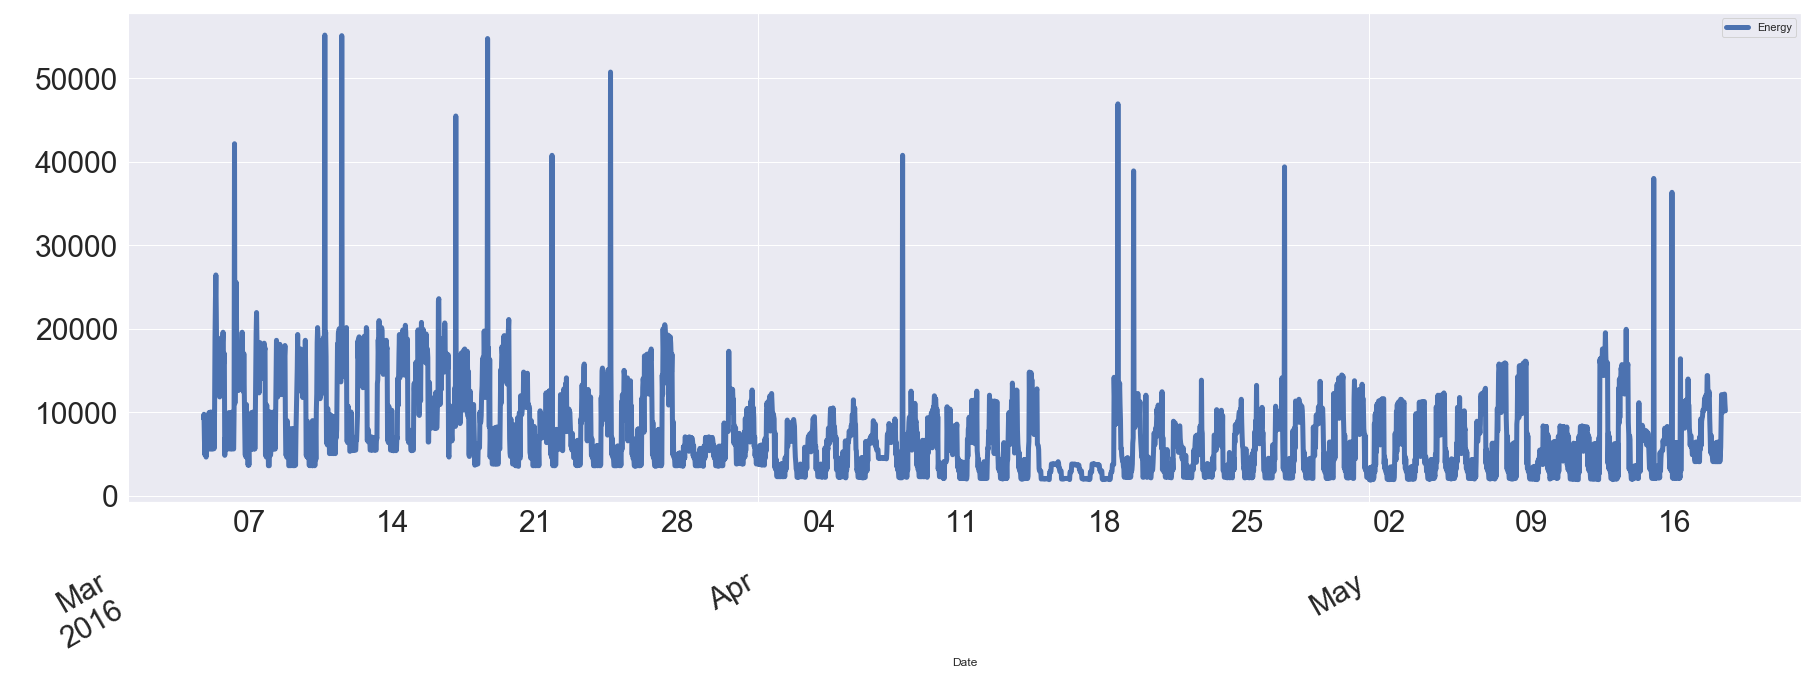

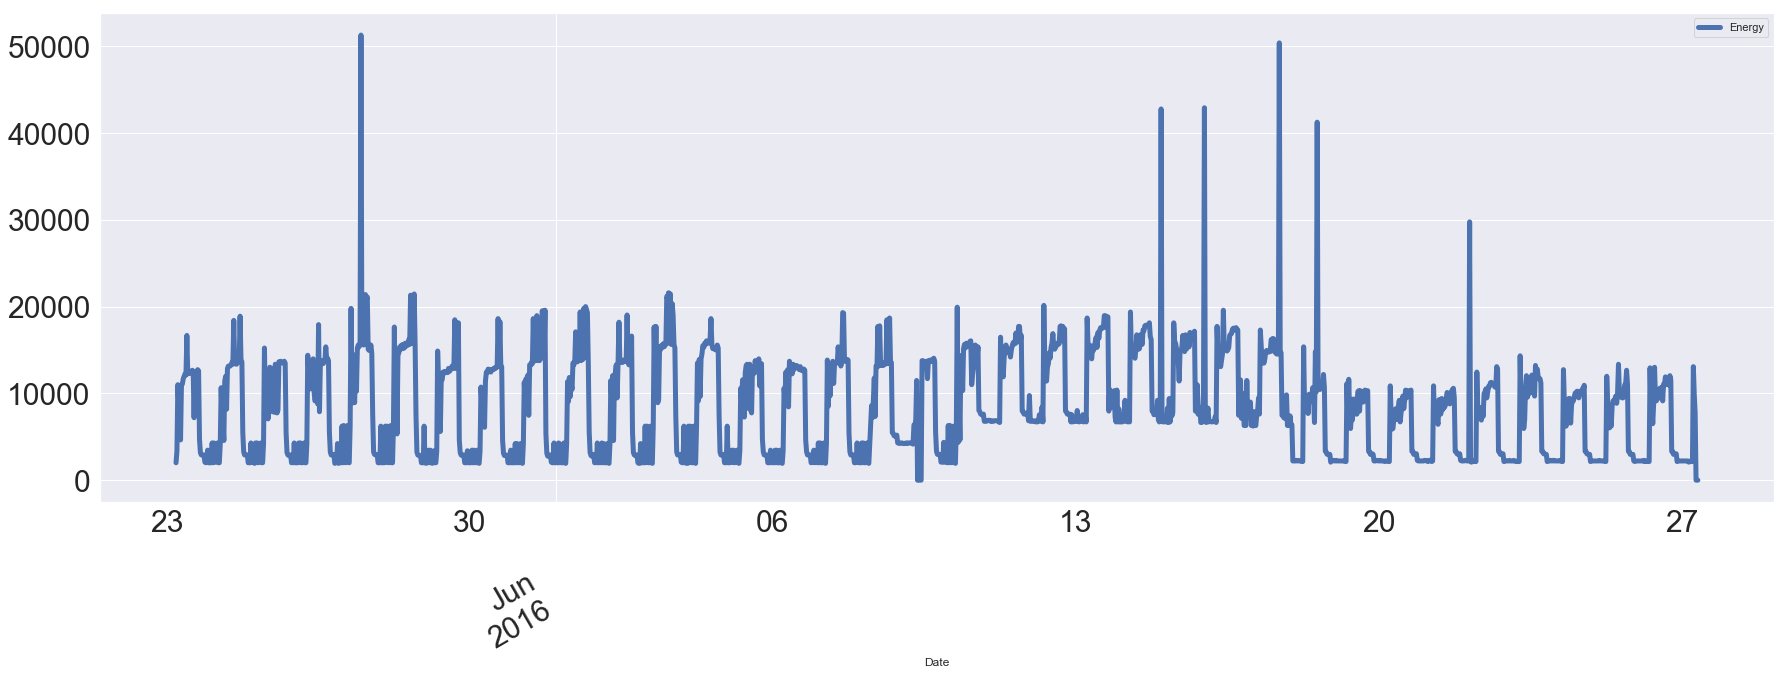

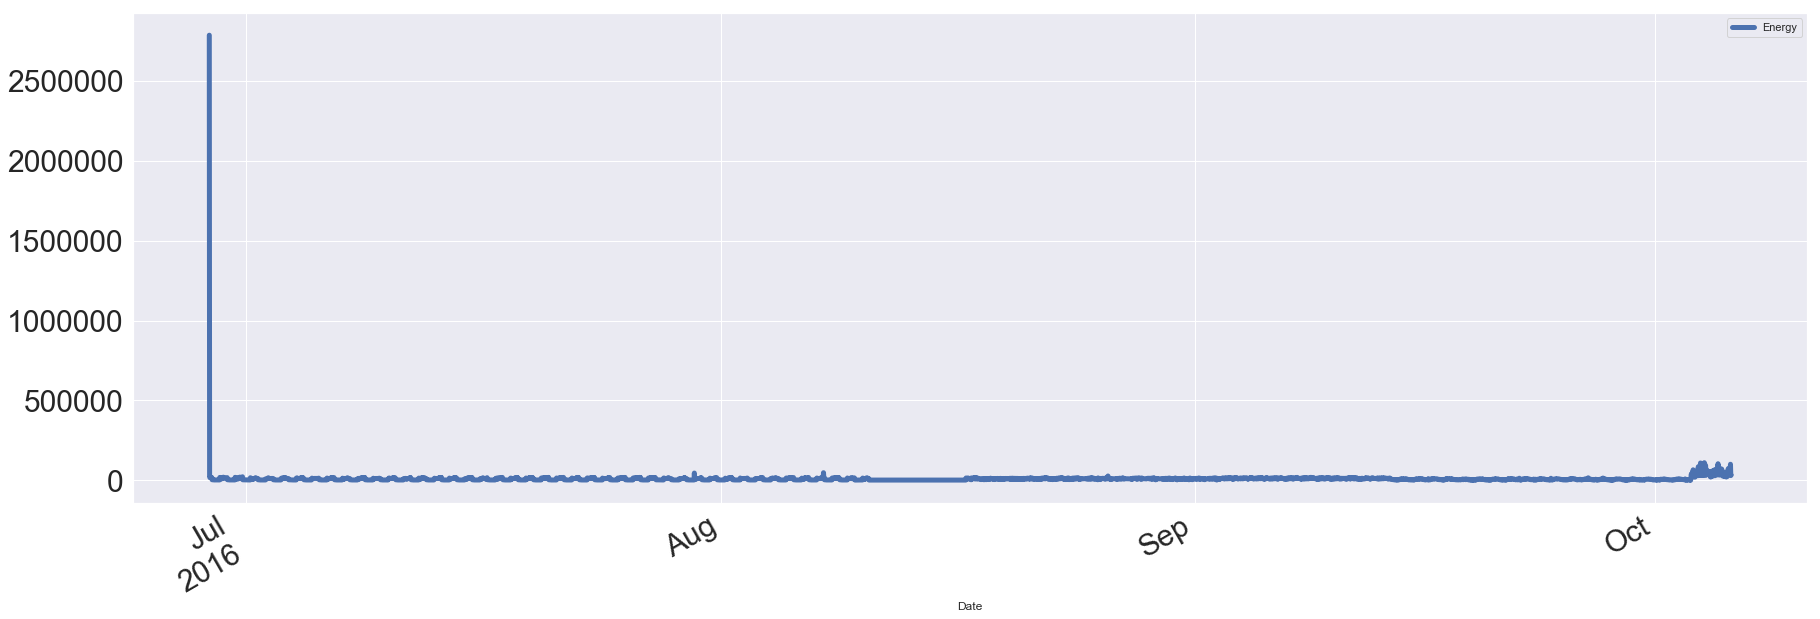

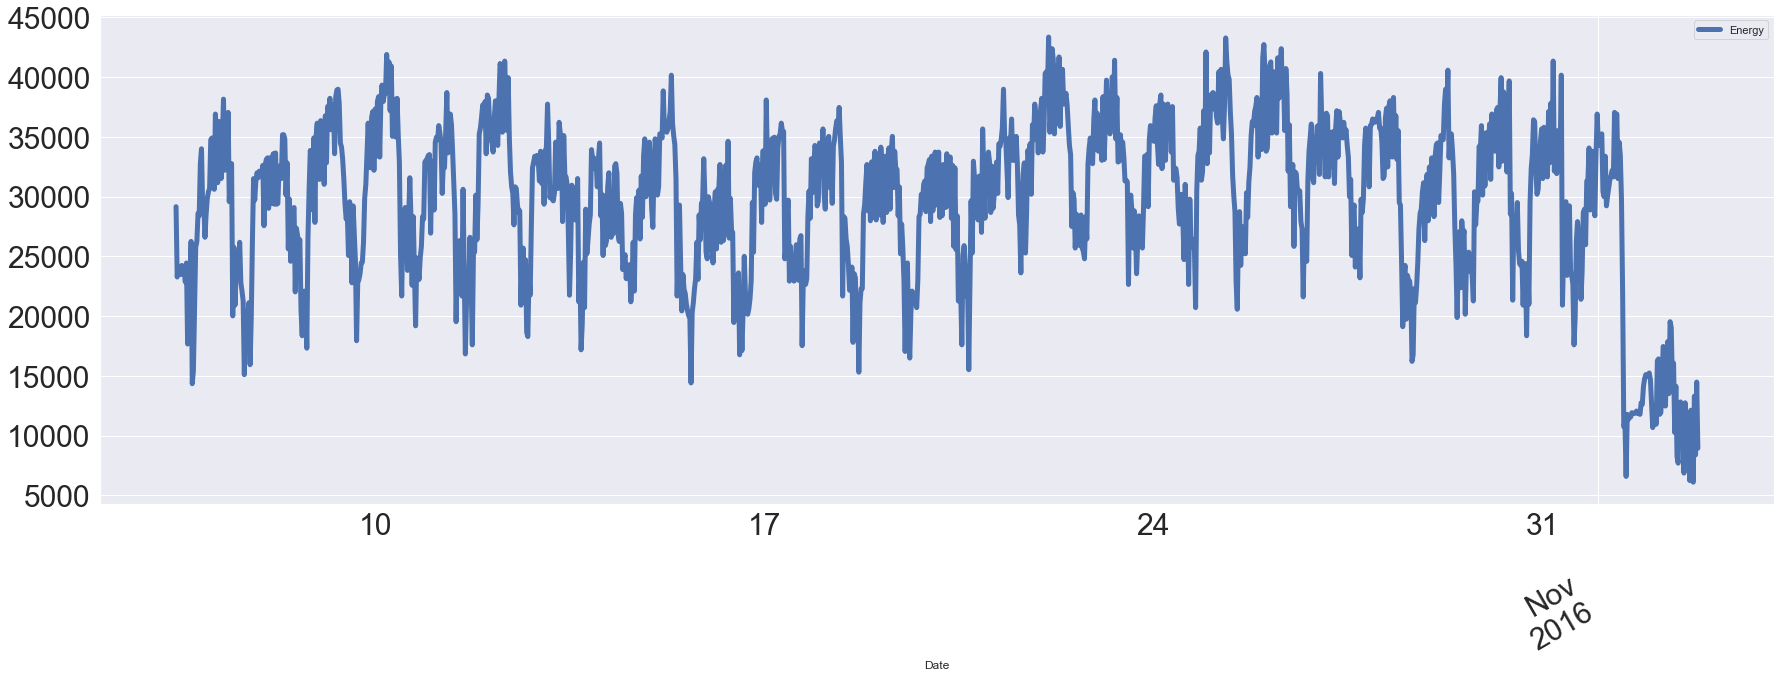

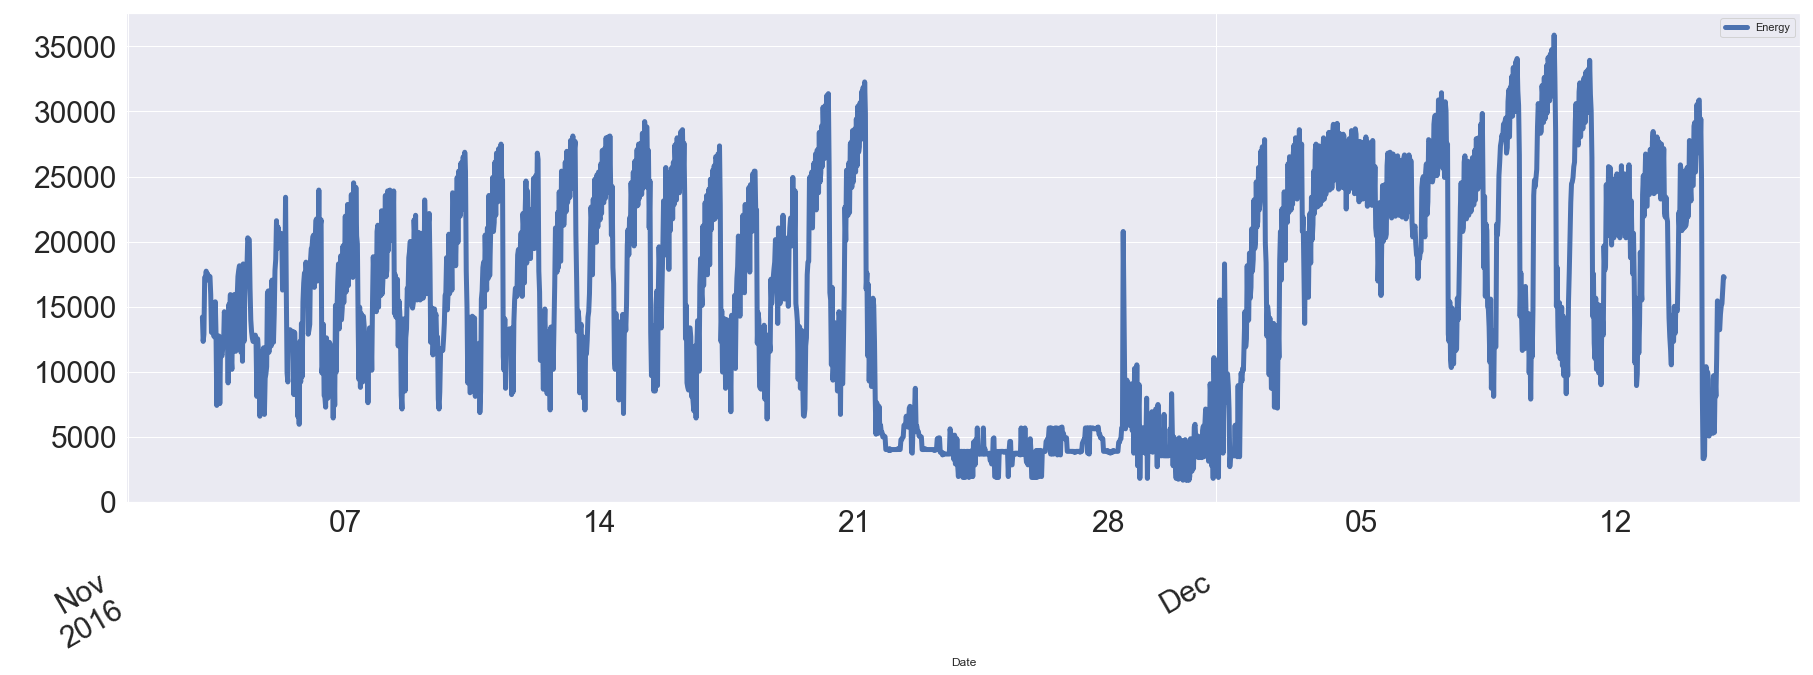

In [551]:
df11r.plot(subplots=True,figsize=(30,10), linewidth=5, fontsize=30)
df12r.plot(subplots=True,figsize=(30,10), linewidth=5, fontsize=30)
df13r.plot(subplots=True,figsize=(30,10), linewidth=5, fontsize=30)
df14r.plot(subplots=True,figsize=(30,10), linewidth=5, fontsize=30)
df15r.plot(subplots=True,figsize=(30,10), linewidth=5, fontsize=30)


Concatenate Dataframes to make a usable Time series data frame without gaps

In [346]:
df1r=pd.concat([df11r,df12r,df13r,df14r,df15r],axis=0)
df11r.head()

,Energy
Date,
2016-03-04 17:28:00,9279.285
2016-03-04 17:58:00,9764.024
2016-03-04 18:28:00,6786.343
2016-03-04 18:58:00,4916.636
2016-03-04 19:28:00,5470.624


In [548]:
df1r.isnull().sum()

Energy    0
dtype: int64

Plot the dataframe values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BA1C6E588>],
      dtype=object)

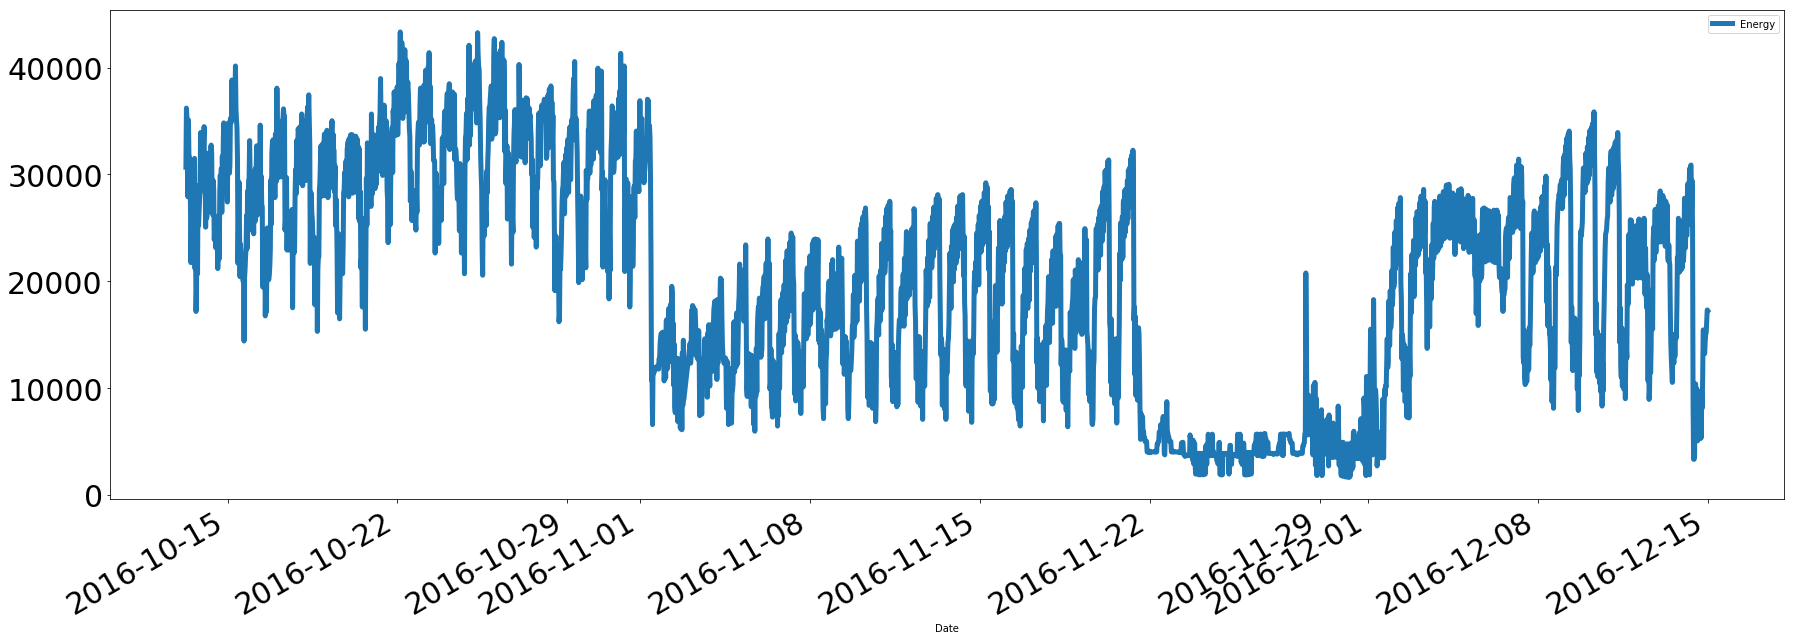

In [414]:
df1r[df1r.size-3000:].plot(subplots=True,figsize=(30,10), linewidth=5, fontsize=30)


#### Modeling:

###### Identification: 
Make a view to the acf and pacf plots to conclude the parametres of the Arima model

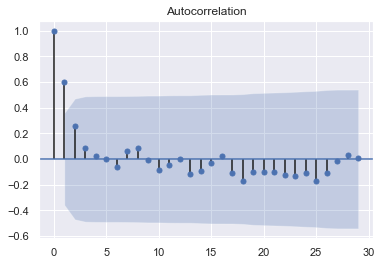

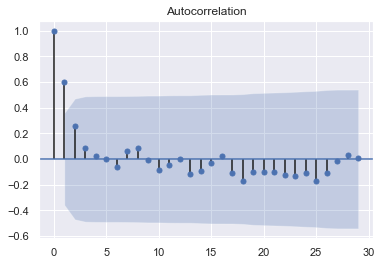

In [461]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1r[:30])

We see that there is a seasonality in the Time serie so we need to integrate 

In [462]:
df1r_diff = df1r.diff(periods=1)
df1r_diff = df1r_diff[1:]
df1r_diff.head()

,Energy
Date,
2016-03-04 17:58:00,484.739
2016-03-04 18:28:00,-2977.681
2016-03-04 18:58:00,-1869.707
2016-03-04 19:28:00,553.988
2016-03-04 19:58:00,3462.420


After integrate by 1 period we check the acf and pacf plot again

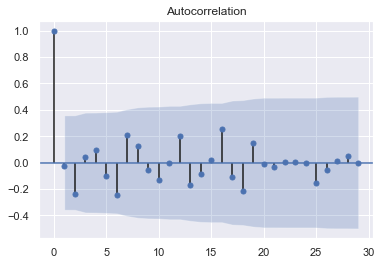

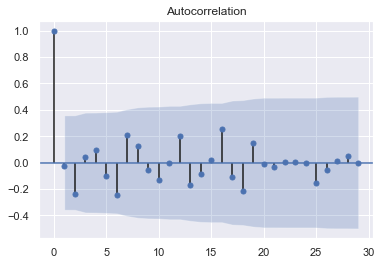

In [464]:
plot_acf(df1r_diff[:30])

By analyzing these two plots we see that seasonality is eliminated and we plot the time serie to confirm our conclusions. 

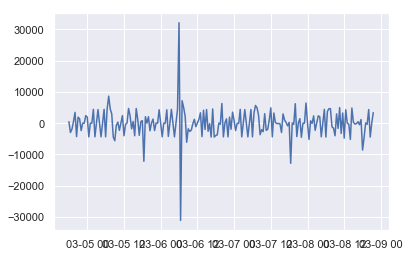

In [465]:
plt.plot(df1r_diff[:200])

###### Estimation and prediction:

In [515]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
def predict(coef, history):
   yhat = 0.0
   for i in range(1, len(coef)+1):
     yhat += coef[i-1] * history[-i]
   return yhat
 
def difference(dataset):
   diff = list()
   for i in range(1, len(dataset)):
     value = dataset[i] - dataset[i - 1]
     diff.append(value)
   return numpy.array(diff)
 
X = df1r.values
size = len(X) - 2000
train, test = X[0:size], X[size:size+2000]
history = [x for x in train]
predictions = list()
model = ARIMA(train, order=(1,1,2))
model_fit = model.fit(trend='nc', disp=False)
ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
resid = model_fit.resid
for t in range(len(test)):
   diff = difference(history)
   yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
   predictions.append(yhat)
   obs = test[t]
   history.append(obs)
   print(t,'>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

0 >predicted=19623.706, expected=13087.950
1 >predicted=19002.583, expected=12741.710
2 >predicted=18538.229, expected=12672.460
3 >predicted=18705.199, expected=15373.140
4 >predicted=23768.107, expected=12949.450
5 >predicted=16974.296, expected=7409.579
6 >predicted=8776.911, expected=9764.024
7 >predicted=17863.717, expected=12326.220
8 >predicted=20603.086, expected=12741.710
9 >predicted=19187.841, expected=7548.076
10 >predicted=9210.683, expected=11979.970
11 >predicted=21851.335, expected=11356.740
12 >predicted=16917.039, expected=11218.240
13 >predicted=17191.922, expected=11910.720
14 >predicted=18593.071, expected=12118.470
15 >predicted=18387.438, expected=14611.410
16 >predicted=22829.214, expected=14057.420
17 >predicted=19676.767, expected=13226.440
18 >predicted=18609.567, expected=13434.190
19 >predicted=19703.158, expected=13918.930
20 >predicted=20424.118, expected=9140.788
21 >predicted=11157.731, expected=15165.400
22 >predicted=26395.053, expected=14403.670
23 >

189 >predicted=24177.917, expected=24167.690
190 >predicted=35043.007, expected=20428.280
191 >predicted=23331.065, expected=19805.040
192 >predicted=25365.330, expected=13711.180
193 >predicted=14606.064, expected=9417.782
194 >predicted=11848.120, expected=14957.650
195 >predicted=25773.908, expected=8794.547
196 >predicted=9630.379, expected=14472.920
197 >predicted=25407.297, expected=9971.770
198 >predicted=12224.935, expected=9210.037
199 >predicted=14652.219, expected=14265.170
200 >predicted=24668.041, expected=13503.440
201 >predicted=18945.624, expected=9625.528
202 >predicted=12410.197, expected=11148.990
203 >predicted=18540.012, expected=12741.710
204 >predicted=20191.796, expected=12256.970
205 >predicted=17935.374, expected=7617.324
206 >predicted=9752.378, expected=12326.220
207 >predicted=22433.816, expected=13364.940
208 >predicted=20342.568, expected=12810.950
209 >predicted=18430.297, expected=13157.200
210 >predicted=19544.282, expected=10110.270
211 >predicted=136

379 >predicted=36721.455, expected=23198.210
380 >predicted=25923.824, expected=23752.200
381 >predicted=30316.445, expected=27491.620
382 >predicted=36772.436, expected=24236.940
383 >predicted=27553.108, expected=24721.680
384 >predicted=31226.868, expected=11148.990
385 >predicted=5665.843, expected=10110.270
386 >predicted=15316.234, expected=14057.420
387 >predicted=23515.390, expected=8725.299
388 >predicted=10269.802, expected=12049.220
389 >predicted=20975.694, expected=13018.700
390 >predicted=19937.280, expected=12672.460
391 >predicted=18468.979, expected=12464.710
392 >predicted=18379.335, expected=13295.690
393 >predicted=20096.155, expected=13018.700
394 >predicted=18874.276, expected=13226.440
395 >predicted=19495.399, expected=8240.560
396 >predicted=10080.341, expected=13364.940
397 >predicted=23826.865, expected=8448.306
398 >predicted=10347.141, expected=13849.680
399 >predicted=24547.829, expected=15511.640
400 >predicted=23020.774, expected=16411.870
401 >predicted

566 >predicted=30583.252, expected=27560.860
567 >predicted=36723.553, expected=23613.710
568 >predicted=26339.332, expected=28322.590
569 >predicted=38430.172, expected=24098.440
570 >predicted=26587.833, expected=24444.690
571 >predicted=30831.772, expected=29222.820
572 >predicted=39389.459, expected=24583.180
573 >predicted=26718.239, expected=28738.090
574 >predicted=38373.240, expected=28807.340
575 >predicted=34958.193, expected=24167.690
576 >predicted=26302.740, expected=27006.880
577 >predicted=35519.969, expected=21051.510
578 >predicted=22064.499, expected=24652.430
579 >predicted=33815.131, expected=13018.700
580 >predicted=9189.120, expected=9694.776
581 >predicted=12951.892, expected=13572.690
582 >predicted=22971.615, expected=13018.700
583 >predicted=18638.047, expected=8517.553
584 >predicted=10770.720, expected=12880.200
585 >predicted=22692.511, expected=8517.553
586 >predicted=10888.835, expected=15096.150
587 >predicted=26798.248, expected=16204.130
588 >predicted

758 >predicted=30397.371, expected=16965.860
759 >predicted=20222.980, expected=15650.140
760 >predicted=20619.875, expected=20082.040
761 >predicted=29953.411, expected=15026.900
762 >predicted=16807.616, expected=19666.540
763 >predicted=29715.074, expected=21051.510
764 >predicted=28324.424, expected=21813.250
765 >predicted=28554.667, expected=20497.530
766 >predicted=25467.265, expected=19666.540
767 >predicted=25049.659, expected=24929.420
768 >predicted=35509.460, expected=20289.780
769 >predicted=22424.839, expected=19874.290
770 >predicted=25611.752, expected=23890.700
771 >predicted=33407.736, expected=15234.650
772 >predicted=13944.469, expected=14680.660
773 >predicted=20300.007, expected=13849.680
774 >predicted=19232.807, expected=9417.782
775 >predicted=11730.006, expected=13503.440
776 >predicted=23079.531, expected=13434.190
777 >predicted=19466.929, expected=8725.299
778 >predicted=10801.300, expected=13157.200
779 >predicted=23028.571, expected=13157.200
780 >predict

943 >predicted=10236.509, expected=4016.407
944 >predicted=10049.147, expected=4016.407
945 >predicted=10108.203, expected=4016.407
946 >predicted=10108.203, expected=4016.407
947 >predicted=10108.203, expected=4016.407
948 >predicted=10108.203, expected=4016.407
949 >predicted=10108.203, expected=4016.407
950 >predicted=10108.203, expected=4016.407
951 >predicted=10108.203, expected=4016.407
952 >predicted=10108.203, expected=4016.407
953 >predicted=10108.203, expected=4016.407
954 >predicted=10108.203, expected=3947.159
955 >predicted=9979.900, expected=3947.159
956 >predicted=10038.955, expected=4016.407
957 >predicted=10167.259, expected=4016.407
958 >predicted=10108.203, expected=4847.388
959 >predicted=11647.854, expected=4778.140
960 >predicted=10810.881, expected=4916.636
961 >predicted=11126.543, expected=4916.636
962 >predicted=11008.432, expected=3808.662
963 >predicted=8955.565, expected=3808.662
964 >predicted=9900.458, expected=3808.662
965 >predicted=9900.458, expected=3

1131 >predicted=9083.869, expected=3877.910
1132 >predicted=9969.706, expected=3877.910
1133 >predicted=9969.706, expected=3877.910
1134 >predicted=9969.706, expected=3877.910
1135 >predicted=9969.706, expected=3877.910
1136 >predicted=9969.706, expected=3877.910
1137 >predicted=9969.706, expected=3877.910
1138 >predicted=9969.706, expected=3877.910
1139 >predicted=9969.706, expected=3808.662
1140 >predicted=9841.403, expected=3877.910
1141 >predicted=10028.762, expected=3808.662
1142 >predicted=9841.403, expected=3877.910
1143 >predicted=10028.762, expected=3877.910
1144 >predicted=9969.706, expected=3877.910
1145 >predicted=9969.706, expected=3877.910
1146 >predicted=9969.706, expected=3877.910
1147 >predicted=9969.706, expected=3808.662
1148 >predicted=9841.403, expected=3877.910
1149 >predicted=10028.762, expected=3877.910
1150 >predicted=9969.706, expected=4501.146
1151 >predicted=11124.445, expected=4639.643
1152 >predicted=10849.551, expected=4778.140
1153 >predicted=10988.048, 

1321 >predicted=13367.077, expected=2769.936
1322 >predicted=4314.434, expected=5955.362
1323 >predicted=14763.725, expected=1800.458
1324 >predicted=4348.905, expected=11079.740
1325 >predicted=25085.013, expected=7755.820
1326 >predicted=11012.940, expected=9140.788
1327 >predicted=16413.701, expected=8725.299
1328 >predicted=14462.761, expected=5401.375
1329 >predicted=8658.491, expected=6647.846
1330 >predicted=13802.647, expected=1869.707
1331 >predicted=3886.652, expected=9764.024
1332 >predicted=22588.183, expected=15511.640
1333 >predicted=26505.068, expected=7825.069
1334 >predicted=7361.671, expected=6232.356
1335 >predicted=10965.869, expected=12395.460
1336 >predicted=23743.221, expected=3739.414
1337 >predicted=2449.236, expected=7409.579
1338 >predicted=16631.333, expected=18281.580
1339 >predicted=33645.141, expected=13087.950
1340 >predicted=14750.560, expected=7686.572
1341 >predicted=9172.012, expected=9002.292
1342 >predicted=16216.149, expected=9833.272
1343 >predic

1511 >predicted=26231.392, expected=28668.840
1512 >predicted=39012.659, expected=28253.350
1513 >predicted=33990.812, expected=24029.190
1514 >predicted=26518.575, expected=27560.860
1515 >predicted=36664.504, expected=27353.120
1516 >predicted=33267.753, expected=23059.720
1517 >predicted=25490.056, expected=27699.360
1518 >predicted=37747.894, expected=25067.920
1519 >predicted=28915.594, expected=23475.210
1520 >predicted=28208.725, expected=27630.110
1521 >predicted=37265.252, expected=23267.460
1522 >predicted=25638.739, expected=24167.690
1523 >predicted=31027.213, expected=27214.620
1524 >predicted=35904.872, expected=23336.710
1525 >predicted=26121.381, expected=28045.600
1526 >predicted=38153.191, expected=27006.880
1527 >predicted=32212.844, expected=22713.470
1528 >predicted=25143.798, expected=27630.110
1529 >predicted=37914.872, expected=27283.870
1530 >predicted=33080.389, expected=22851.970
1531 >predicted=25164.192, expected=27283.870
1532 >predicted=37155.241, expecte

1695 >predicted=9882.781, expected=13157.200
1696 >predicted=23560.074, expected=11910.720
1697 >predicted=16939.504, expected=11910.720
1698 >predicted=18002.516, expected=21328.510
1699 >predicted=35451.904, expected=20497.530
1700 >predicted=25880.657, expected=21605.500
1701 >predicted=28642.186, expected=25067.920
1702 >predicted=34112.507, expected=26106.650
1703 >predicted=33084.287, expected=27353.120
1704 >predicted=34507.920, expected=27699.360
1705 >predicted=34086.434, expected=28184.100
1706 >predicted=34689.288, expected=27907.100
1707 >predicted=33762.667, expected=29015.080
1708 >predicted=36051.774, expected=29084.330
1709 >predicted=35235.183, expected=29222.820
1710 >predicted=35432.722, expected=29499.820
1711 >predicted=35827.845, expected=26799.130
1712 >predicted=30587.747, expected=27214.620
1713 >predicted=33660.751, expected=30746.290
1714 >predicted=39849.934, expected=31646.520
1715 >predicted=38506.043, expected=28045.600
1716 >predicted=31066.491, expected

1876 >predicted=21432.885, expected=23128.960
1877 >predicted=32941.265, expected=19735.790
1878 >predicted=22933.853, expected=17519.840
1879 >predicted=21721.849, expected=20636.020
1880 >predicted=29385.330, expected=16827.360
1881 >predicted=19671.088, expected=10664.250
1882 >predicted=11500.076, expected=15650.140
1883 >predicted=25993.959, expected=8933.044
1884 >predicted=9296.425, expected=9833.272
1885 >predicted=16692.793, expected=14819.160
1886 >predicted=25162.978, expected=11425.990
1887 >predicted=14624.053, expected=13711.180
1888 >predicted=21751.812, expected=19181.810
1889 >predicted=29939.021, expected=16481.120
1890 >predicted=20269.737, expected=15511.640
1891 >predicted=20776.653, expected=23613.710
1892 >predicted=36615.043, expected=25067.920
1893 >predicted=32399.883, expected=21951.740
1894 >predicted=25386.023, expected=24375.440
1895 >predicted=32534.195, expected=26729.880
1896 >predicted=34829.569, expected=22782.720
1897 >predicted=25508.334, expected=2

Plot of the the forcasted values and the actual values:

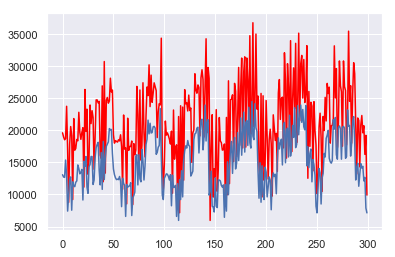

In [518]:
plt.plot(predictions[:300],color='red')
plt.plot(test[:300])

#### Evaluation:

The RMSE value:

In [549]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7993.424
